# Analisi Dataset Dummy #

#### Libraries Import ####

In [2]:
import pandas as pd
from langdetect import detect
from IPython.display import display
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
from numpy import mean
from sklearn import metrics


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('omw-1.4')

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split





from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to /home/paoloc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/paoloc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/paoloc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/paoloc/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### DataSet Reading ####

In [3]:
df = pd.read_csv(".csv", sep='___', engine='python')


#### Check language of the news ####

In [30]:

total_news = 0
en_news = 0
it_news = 0
foreign_news = 0


for news in df['news']:
    if(detect(news) == 'en'):
        en_news += 1
        total_news += 1
    if(detect(news) == 'it'):
        it_news += 1
        total_news += 1   
    if(detect(news) != 'en' and detect(news) != 'it'):
        foreign_news += 1
        total_news += 1


print('Total News: ', total_news )
print('Italian News: ', it_news)
print('English News: ', en_news)
print('Foreign News: ', foreign_news)



Total News:  1034
Italian News:  74
English News:  936
Foreign News:  24


Keeping just the english ones (approx. 90%)

In [4]:

for news in df['news']:
    if(detect(news) == 'it' or detect(news) != 'en'):
        df = df.drop((df.index[df["news"]== news].tolist()))
 
total_news = 0
en_news = 0
it_news = 0
foreign_news = 0

for news in df['news']:
    if(detect(news) == 'en'):
        en_news += 1
        total_news += 1
    if(detect(news) == 'it'):
        it_news += 1
        total_news += 1   
    if(detect(news) != 'en' and detect(news) != 'it'):
        foreign_news += 1
        total_news += 1


print('Total News: ', total_news )
print('Italian News: ', it_news)
print('English News: ', en_news)
print('Foreign News: ', foreign_news)

df.reset_index(drop=True, inplace=True)

Total News:  936
Italian News:  0
English News:  936
Foreign News:  0


#### Checking the most common categories to make a 5-top selection ####

In [247]:
#df = df.dropna()
#df.reset_index(inplace=True, drop=True)
#Counter(" ".join(df["category"]).split()).most_common(10)
#Counter(" ".join(df["category.1"]).split()).most_common(10)
#Counter(" ".join(df["category.2"]).split()).most_common(10)
#Counter(" ".join(df["category.3"]).split()).most_common(10)
#Counter(" ".join(df["category.4"]).split()).most_common(10)




[('NotList', 281),
 ('OHCHR-Reject', 164),
 ('Health-Effects', 90),
 ('RIO_Scope', 40),
 ('Content-For-DPKR-NorthKorea', 38),
 ('ET_SportPT', 36),
 ('Firma_opslag', 34),
 ('GeneralEconomicKeywords', 30),
 ('WesternBalkans-Politics2', 28),
 ('ET_SPORTFR', 26)]

#### Define categories for all the news ####
Adding a new column where the definitive category will be written.

In [5]:
df = df.reindex(columns = df.columns.tolist() + ["cate_def"])


Iterate all over the rows to put the most relevant category (from the 5 selected) in the definitive slot. Let's just recap the categories are ordered by importance, from the most important (category) to the least important (category.4), so when the slot is fullfilled is never more touched.

In [6]:
count = 0

for cate0, cate1, cate2, cate3, cate4, catedef in zip(df['category'], df['category.1'], df['category.2'], df['category.3'], df['category.4'], df['cate_def']):
    if(cate0 == 'Coronavirus' or cate0 == 'GeneralEconomicKeywords' or cate0 == 'ET_SPORTFR' or cate0 == 'Health-Effects' or cate0 == 'Treatment'):
        df.loc[count, 'cate_def'] = cate0
    elif((cate1 == 'Coronavirus' or cate1 == 'GeneralEconomicKeywords' or cate1 == 'ET_SPORTFR' or cate1 == 'Health-Effects' or cate1 == 'Treatment') and pd.isna(catedef)):
        df.loc[count, 'cate_def'] = cate1
    elif((cate2 == 'Coronavirus' or cate2 == 'GeneralEconomicKeywords' or cate2 == 'ET_SPORTFR' or cate2 == 'Health-Effects' or cate2 == 'Treatment')and pd.isna(catedef)):
        df.loc[count, 'cate_def'] = cate2
    elif((cate3  == 'Coronavirus' or cate3 == 'GeneralEconomicKeywords' or cate3 == 'ET_SPORTFR' or cate3 == 'Health-Effects' or cate3 == 'Treatment')and pd.isna(catedef)):
        df.loc[count, 'cate_def'] = cate3
    elif((cate4 == 'Coronavirus' or cate4 == 'GeneralEconomicKeywords' or cate4 == 'ET_SPORTFR' or cate4 == 'Health-Effects' or cate4 == 'Treatment') and pd.isna(catedef)):
        df.loc[count, 'cate_def'] = cate4
    count = count + 1


Drop all the no more useful column

In [7]:

df.drop('category', inplace=True, axis=1)
df.drop('category.1', inplace=True, axis=1)
df.drop('category.2', inplace=True, axis=1)
df.drop('category.3', inplace=True, axis=1)
df.drop('category.4', inplace=True, axis=1)

df = df[df['cate_def'].notna()]
df.reset_index(drop=True, inplace=True)

#### Check how the categories are distributed ####

Economic News :  81
CoronaVirus News:  242
Sport News:  126
Treatment News:  115
Health-Effects News:  167


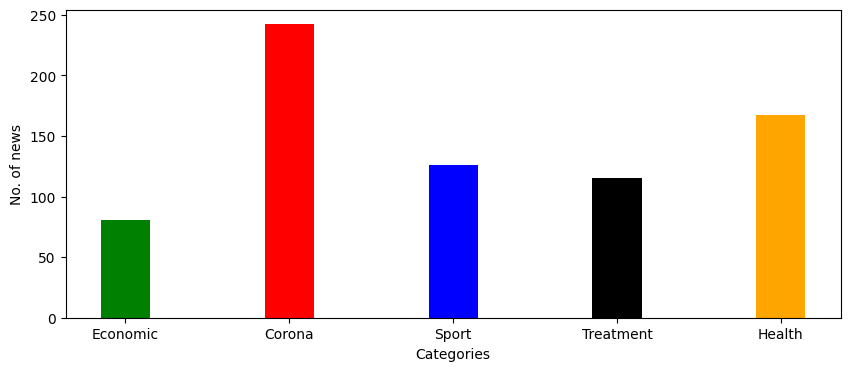

In [8]:
eco_count = 0
corona_count = 0
sport_count = 0
terapy_count = 0
health_count = 0

for categories in df['cate_def']:
    if(categories == 'Coronavirus'):
        corona_count += 1
    if(categories == 'Health-Effects'):
        health_count += 1
    if(categories == 'GeneralEconomicKeywords'):
        eco_count += 1
    if(categories == 'ET_SPORTFR'):
        sport_count += 1
    if(categories == 'Treatment'):
        terapy_count += 1

print('Economic News : ',eco_count)
print('CoronaVirus News: ', corona_count)
print('Sport News: ', sport_count)
print('Treatment News: ', terapy_count)
print('Health-Effects News: ',  health_count)

hist_categories_x = ['Economic', 'Corona', 'Sport', 'Treatment', 'Health']
hist_categories_y = [eco_count, corona_count, sport_count, terapy_count, health_count]

fig = plt.figure(figsize = (10, 4))

plt.bar(hist_categories_x, hist_categories_y, color =['green','red','blue','black','orange'], aa=True, width = 0.3)
plt.xlabel("Categories")
plt.ylabel("No. of news")
plt.show()

### Text Cleaning ###

In [9]:
df.rename(columns = {'cate_def':'category'}, inplace = True)


df['category_id'] = df['category'].factorize()[0]
for element1, element2 in zip(df['category'].unique(), df['category_id'].unique()):
    print(element1 , '-->' , element2)

GeneralEconomicKeywords --> 0
Treatment --> 1
ET_SPORTFR --> 2
Coronavirus --> 3
Health-Effects --> 4


In [17]:
pd.set_option('display.max_colwidth', None)
df.iloc[233, 2:3]

news    The epidemic of COVID-19 has slowed the demand for car smart displays. Reduced car sales are expected to reduce demand for vehicles as well as passenger safety measures. The testing of semi-autonomous driving systems, as well as enhanced safety features, has been postponed due to nationwide....
Name: 233, dtype: object

In [10]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', str(text))
  
df['news'] = df['news'].apply(remove_tags)

def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
  
df['news'] = df['news'].apply(special_char)

def convert_lower(text):
   return text.lower()

df['news'] = df['news'].apply(convert_lower)

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
  
df['news'] = df['news'].apply(remove_stopwords)


def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

df['news'] = df['news'].apply(lemmatize_word)


In [56]:
df.iloc[233, 2:3]

news    epidemic covid 19 slowed demand car smart display reduced car sale expected reduce demand vehicle well passenger safety measure testing semi autonomous driving system well enhanced safety feature postponed due nationwide
Name: 233, dtype: object

### Learning ###

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df['news'])
y = np.array(df['category_id'])
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X.shape =  (731, 4688)
y.shape =  (731,)


##### Define the k "best" for CV #####

Ideal: 0.781
> folds=2, accuracy=0.729 (0.727,0.732)
> folds=3, accuracy=0.744 (0.717,0.765)
> folds=4, accuracy=0.759 (0.694,0.786)
> folds=5, accuracy=0.757 (0.740,0.795)
> folds=6, accuracy=0.758 (0.730,0.787)
> folds=7, accuracy=0.773 (0.686,0.827)
> folds=8, accuracy=0.770 (0.707,0.835)
> folds=9, accuracy=0.773 (0.683,0.815)
> folds=10, accuracy=0.772 (0.703,0.836)
> folds=11, accuracy=0.768 (0.687,0.833)
> folds=12, accuracy=0.762 (0.656,0.820)
> folds=13, accuracy=0.764 (0.649,0.857)
> folds=14, accuracy=0.774 (0.623,0.865)
> folds=15, accuracy=0.770 (0.633,0.837)


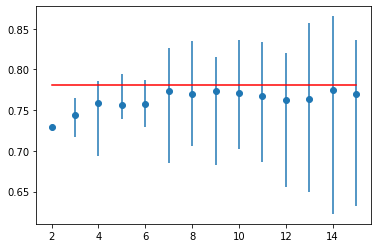

In [26]:
model1 = LogisticRegression()
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	
	# evaluate the model
	scores = cross_val_score(model1, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,16)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()

#### Split and Folds ####

In [19]:
folds = KFold(n_splits = 7, shuffle = True)
y_bin = label_binarize(y, classes=[0,1,2,3,4])
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size = 0.28, random_state = 9)
categories_list = (df['category'].unique())


#### Useful Functions For Evaluation ####

In [16]:
def evaluate(target, prediction):

    accuracy = round(metrics.accuracy_score(target, prediction) * 100, 2)
    precision = round(metrics.precision_score(target, prediction, average='micro') * 100, 2)
    recall = round(metrics.recall_score(target, prediction, average='micro') * 100, 2)
    f1_score = round(metrics.f1_score(target ,prediction, average='micro') * 100, 2)

    confusion_matrix = metrics.confusion_matrix(target.argmax(axis=1), prediction.argmax(axis=1))

    print('Confusion Matrix\n')

    for row in range(len(confusion_matrix)):
        print(categories_list[row]+"\t"+str(confusion_matrix[row]))

    print('\n')

    print('\nClassification Report\n')
    print(classification_report(target, prediction, target_names=categories_list))
    print('Accuracy : ' ,accuracy)


In [71]:
def drawROC(score):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(categories_list)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i in range(len(categories_list)):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve Class: ' + categories_list[i])
        plt.legend(loc="lower right")
        plt.show()



### Baseline (Logistic Regression) ####

In [20]:
mdl1 = LogisticRegression(multi_class='ovr', solver='lbfgs')
clf_1 = OneVsRestClassifier(mdl1)

clf_1.fit(x_train, y_train)
y_pred = clf_1.predict(x_test)

evaluate(y_test, y_pred)

Confusion Matrix

GeneralEconomicKeywords	[17  0  0  0  1]
Treatment	[ 8 20  0  0  0]
ET_SPORTFR	[14  0 23  1  0]
Coronavirus	[22  2  0 54  2]
Health-Effects	[15  0  0  4 22]



Classification Report

                         precision    recall  f1-score   support

GeneralEconomicKeywords       1.00      0.44      0.62        18
              Treatment       0.91      0.71      0.80        28
             ET_SPORTFR       1.00      0.61      0.75        38
            Coronavirus       0.89      0.68      0.77        80
         Health-Effects       0.88      0.54      0.67        41

              micro avg       0.91      0.62      0.74       205
              macro avg       0.93      0.60      0.72       205
           weighted avg       0.92      0.62      0.74       205
            samples avg       0.61      0.62      0.62       205

Accuracy :  60.98


/home/paoloc/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


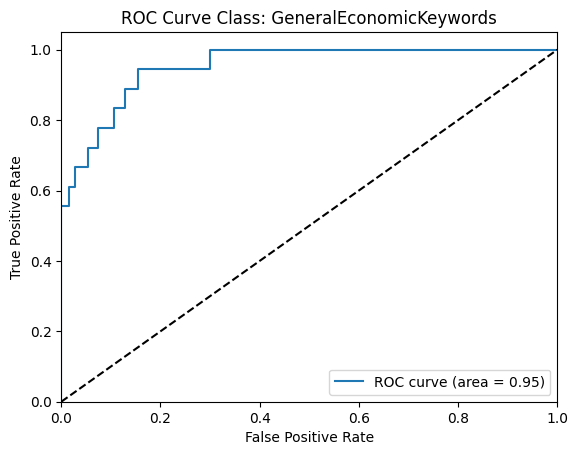

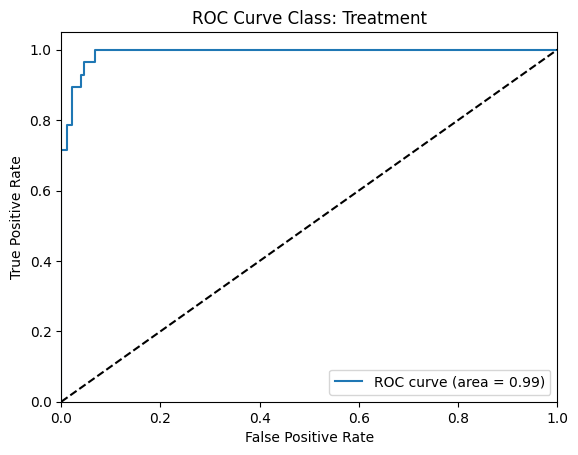

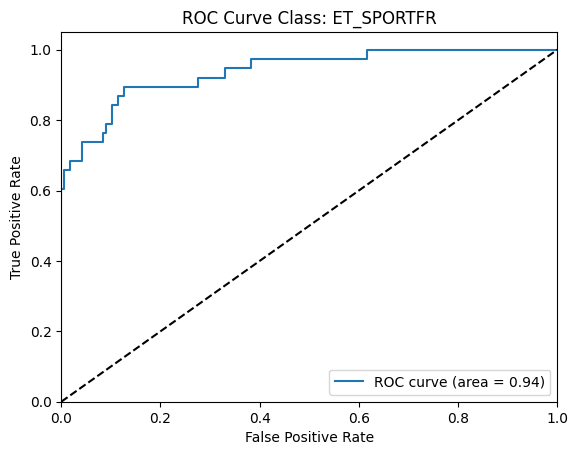

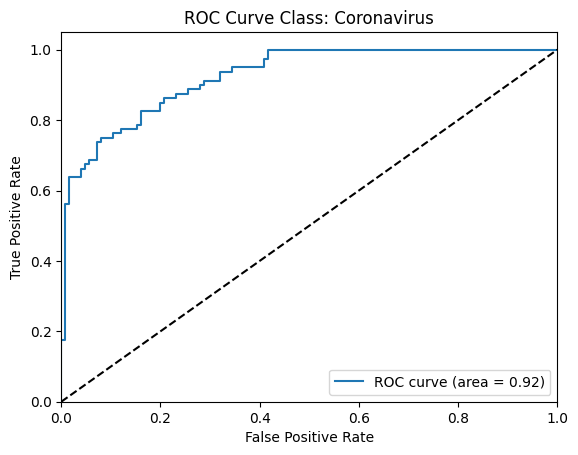

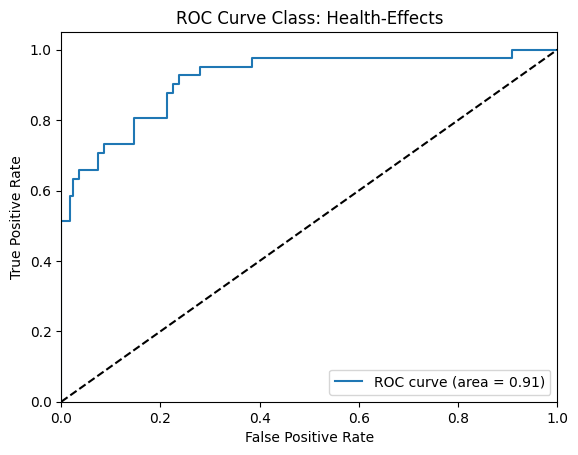

In [74]:
y_score_lr = clf_1.fit(x_train, y_train).decision_function(x_test)

drawROC(y_score_lr)

### Gradient Boosting ###

#### Tuning ####

In [75]:
scores_boost = []

r = [5, 15, 25, 50, 75,  100, 150, 200]
for k in r:
    score_boost = cross_val_score(estimator=GradientBoostingClassifier(n_estimators=k), X = x, y= y, cv=folds, scoring='accuracy')
    scores_boost.append(score_boost.mean())

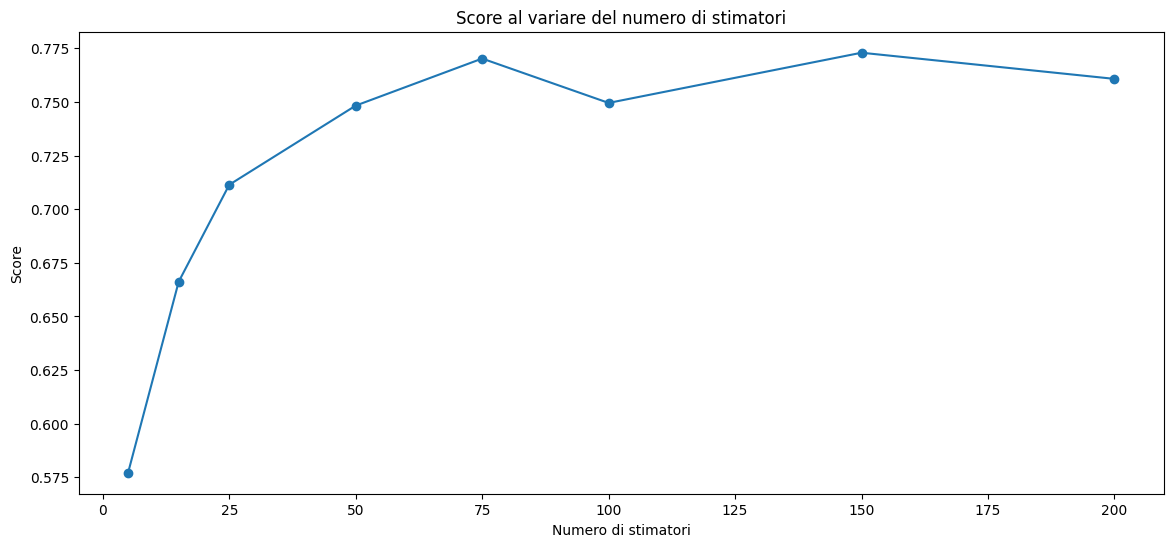

In [76]:
fig = plt.figure(figsize=(14,6))
ax = fig.gca()
plt.plot(r, scores_boost, marker='o') 
plt.xlabel(r'Numero di stimatori')
plt.ylabel('Score')
plt.title(r'Score al variare del numero di stimatori')
plt.show()

In [77]:
gbc = GradientBoostingClassifier(n_estimators=75)
parameters = {
    "max_depth":[3,5,7],
    "learning_rate":[0.01,0.1,1]
}

In [78]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=folds)
cv.fit(x,y)

In [79]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [80]:
display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3}


0.598 + or -0.045 for the {'learning_rate': 0.01, 'max_depth': 3}
0.649 + or -0.043 for the {'learning_rate': 0.01, 'max_depth': 5}
0.668 + or -0.056 for the {'learning_rate': 0.01, 'max_depth': 7}
0.776 + or -0.024 for the {'learning_rate': 0.1, 'max_depth': 3}
0.77 + or -0.021 for the {'learning_rate': 0.1, 'max_depth': 5}
0.774 + or -0.021 for the {'learning_rate': 0.1, 'max_depth': 7}
0.748 + or -0.036 for the {'learning_rate': 1, 'max_depth': 3}
0.744 + or -0.029 for the {'learning_rate': 1, 'max_depth': 5}
0.754 + or -0.027 for the {'learning_rate': 1, 'max_depth': 7}


#### Learning ####

In [69]:
mdl2 = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, max_depth=3)
clf_2 = OneVsRestClassifier(mdl2) 

clf_2.fit(x_train, y_train)
y_pred = clf_2.predict(x_test)

evaluate(y_test, y_pred)


Confusion Matrix

GeneralEconomicKeywords	[16  0  0  2  0]
Treatment	[ 5 22  0  1  0]
ET_SPORTFR	[18  0 20  0  0]
Coronavirus	[23  2  1 52  2]
Health-Effects	[22  1  0  1 17]


Metrics

Accuracy :  56.59 
Precision : 88.89 
Recall :  58.54 
F1 Score :  70.59

Classification Report

                         precision    recall  f1-score   support

GeneralEconomicKeywords       0.78      0.39      0.52        18
              Treatment       0.88      0.79      0.83        28
             ET_SPORTFR       0.95      0.53      0.68        38
            Coronavirus       0.89      0.68      0.77        80
         Health-Effects       0.89      0.41      0.57        41

              micro avg       0.89      0.59      0.71       205
              macro avg       0.88      0.56      0.67       205
           weighted avg       0.89      0.59      0.70       205
            samples avg       0.58      0.59      0.58       205



/home/paoloc/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


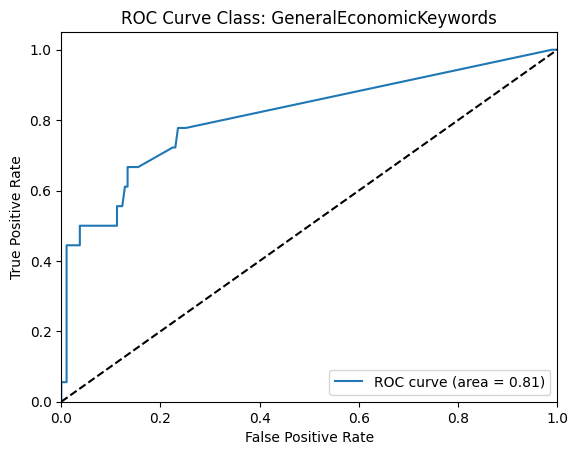

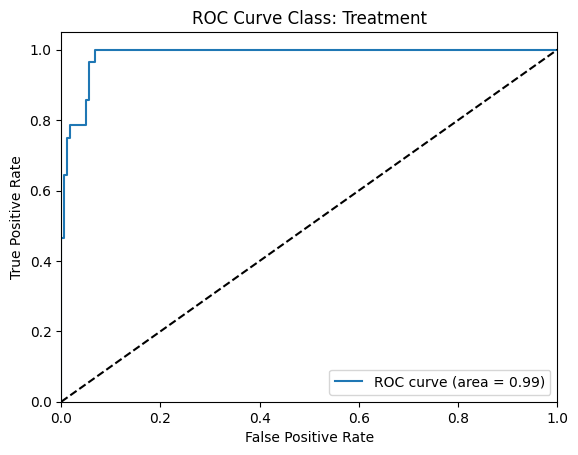

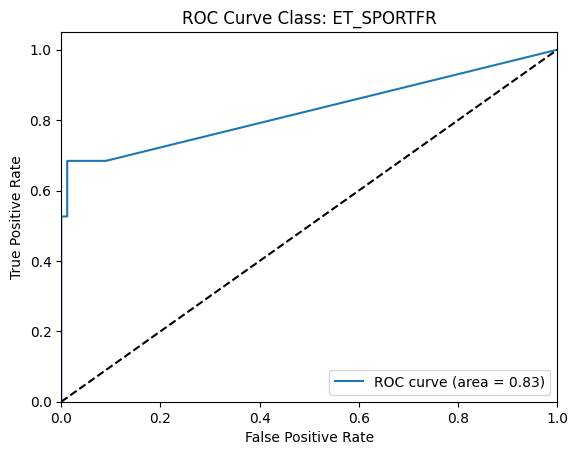

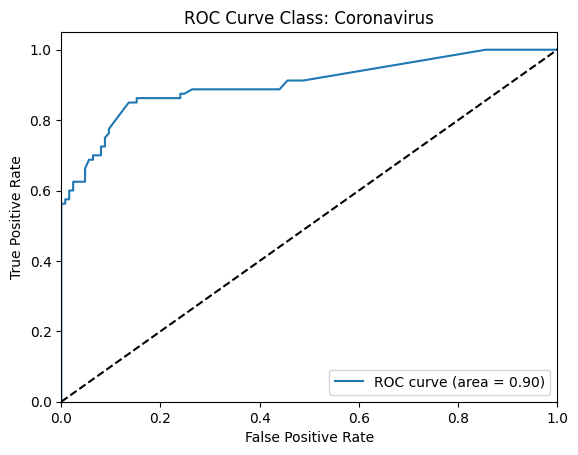

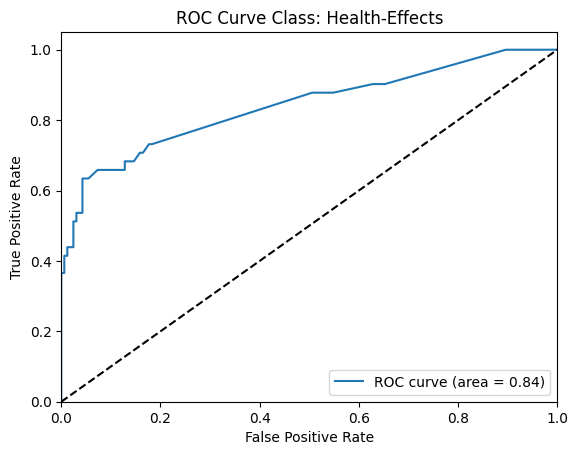

In [75]:
y_score_gb = clf_2.fit(x_train, y_train).decision_function(x_test)
drawROC(y_score_gb)

#### Multinomial Naive Bayes ####

#### Tuning ####

In [85]:
np.logspace(0,-9, num=10)
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=7, 
                                    n_repeats=3)

params_NB = {'alpha': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=MultinomialNB(), 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


gs_NB.fit(x,y)


Fitting 21 folds for each of 100 candidates, totalling 2100 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=7, random_state=None),
             estimator=MultinomialNB(),
             param_grid={'alpha': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.336...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [87]:
gs_NB.best_params_

{'alpha': 0.004328761281083057}

#### Learning ####

In [76]:
mdl3 = MultinomialNB(alpha = 0.004328761281083057)
clf_3 = OneVsRestClassifier(mdl3) 

clf_3.fit(x_train, y_train)
y_pred = clf_3.predict(x_test)

evaluate(y_test, y_pred)


Confusion Matrix

GeneralEconomicKeywords	[17  0  0  0  1]
Treatment	[ 2 24  0  2  0]
ET_SPORTFR	[ 9  1 26  0  2]
Coronavirus	[16  6  2 53  3]
Health-Effects	[ 9  0  1  6 25]


Metrics

Accuracy :  66.83 
Precision : 71.63 
Recall :  72.68 
F1 Score :  72.15

Classification Report

                         precision    recall  f1-score   support

GeneralEconomicKeywords       0.44      0.78      0.56        18
              Treatment       0.75      0.86      0.80        28
             ET_SPORTFR       0.81      0.68      0.74        38
            Coronavirus       0.81      0.69      0.74        80
         Health-Effects       0.68      0.73      0.71        41

              micro avg       0.72      0.73      0.72       205
              macro avg       0.70      0.75      0.71       205
           weighted avg       0.74      0.73      0.73       205
            samples avg       0.70      0.73      0.71       205



/home/paoloc/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


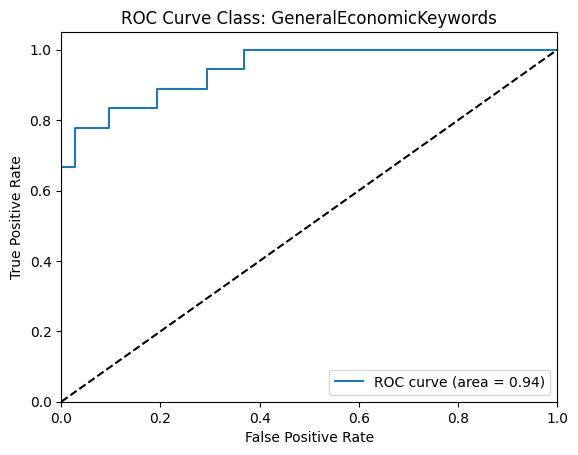

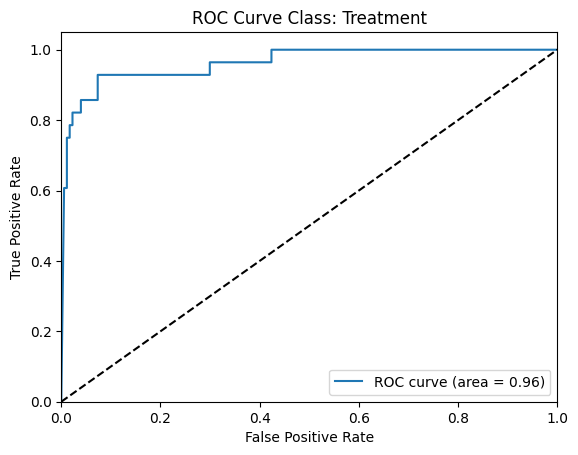

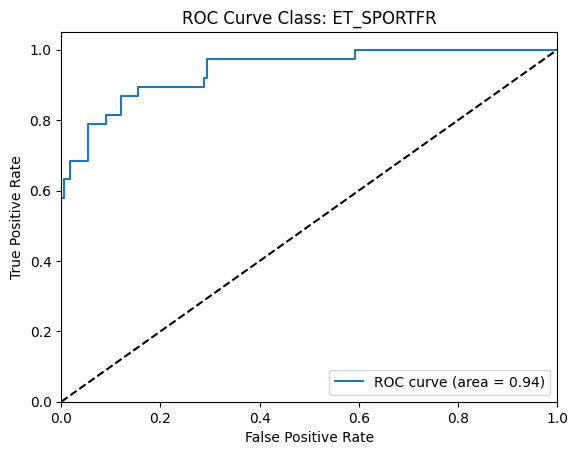

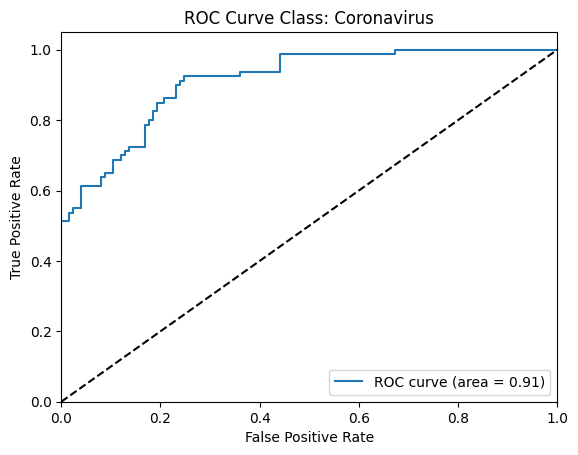

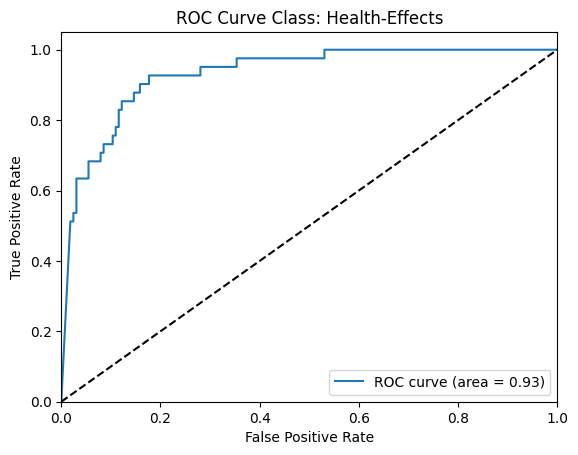

In [77]:

Y_gnb_score = clf_3.predict_proba(x_test)
drawROC(Y_gnb_score)
